# Segmenting and Clustering Neighborhoods in Toronto

In [1]:
!pip install bs4

In [269]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [270]:
Canada_M = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(Canada_M, "html")

In [271]:
PostalCode = []
Borough = []
Neighborhood = []
for data in soup.tbody.find_all('tr')[1:]:
    tds=data.find_all('td')
    post = str(tds[0]).replace('<td>','').replace('</td>','').replace('\n','')
    bor = str(tds[1]).replace('<td>','').replace('</td>','').replace('\n','')
    nei = str(tds[2]).replace('<td>','').replace('</td>','').replace('\n','')
    if bor != "Not assigned":
        PostalCode.append(post)
        Borough.append(bor)
        if len(nei) < 2 or nei == "Not assigned":
            Neighborhood.append(bor)
        else:
             Neighborhood.append(nei)
    


            

In [272]:
alldata = {'PostalCode': PostalCode,
        'Borough': Borough,
        'Neighborhood': Neighborhood}
df = pd.DataFrame(alldata)
# Drop rows where Borough is 'Not assigned', then reset index
#df = df[df.Borough != 'Not assigned'].reset_index().drop('index', axis = 1)
df = df.groupby(df['PostalCode']).aggregate(sum).reset_index()
df.head(13)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [273]:
df.shape

(103, 3)

In [9]:
!pip install geocoder

In [274]:
import geocoder # import geocoder
def getlatlong(postal_code):
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
        print('postal_code',postal_code)
        if lat_lng_coords is None:
            continue
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    print(latitude,'and',longitude)
    return latitude, longitude

longlat=pd.read_csv('http://cocl.us/Geospatial_data')
longlat=longlat.set_index('Postal Code')
def getlnglatfromfile(post):
    try:
        latitude = longlat.loc[post]['Latitude']
        longitude = longlat.loc[post]['Longitude']
    except:
        longitude = latitude = None
    return latitude, longitude


In [275]:
df[['Latitude', 'Longitude']]=df['PostalCode'].apply(lambda x: pd.Series(getlnglatfromfile(x)))


In [276]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...,43.688905,-79.554724
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...,43.739416,-79.588437


In [277]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library


In [278]:
CLIENT_ID = 'BDJG4TVQKDPF5HI1RVGU5IPBTAZUSEIWUHDWN35PEJHD13KW' # your Foursquare ID
CLIENT_SECRET = 'Y55TKSRKRGE3OUKGLXQPQE4TDYTHZS5TJM1QV4POK04IRKSS' # your Foursquare Secret
VERSION = '20200328'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BDJG4TVQKDPF5HI1RVGU5IPBTAZUSEIWUHDWN35PEJHD13KW
CLIENT_SECRET:Y55TKSRKRGE3OUKGLXQPQE4TDYTHZS5TJM1QV4POK04IRKSS


In [279]:
centerlat=df['Latitude'].mean()
centerlong=df['Longitude'].mean()
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...,43.688905,-79.554724
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...,43.739416,-79.588437


In [280]:
venues_map = folium.Map(location=[centerlat, centerlong], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of all postal code regions
folium.CircleMarker(
    [centerlat, centerlong],
    radius=10,
    color='red',
    popup='the Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label, Bor in zip(df.Latitude, df.Longitude, df.PostalCode, df.Borough):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label+' '+Bor,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [282]:
search_query = 'school'
radius = 1000
latitude=43.806686
longitude=-79.194353
print(search_query + ' .... OK!')

school .... OK!


In [283]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BDJG4TVQKDPF5HI1RVGU5IPBTAZUSEIWUHDWN35PEJHD13KW&client_secret=Y55TKSRKRGE3OUKGLXQPQE4TDYTHZS5TJM1QV4POK04IRKSS&ll=43.806686,-79.194353&v=20200328&query=school&radius=1000&limit=30'

In [284]:
results = requests.get(url).json()

In [287]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress
0,561aa40b498e1bc38c11111c,Alvin Curling Public School,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",v-1586010914,False,43.808683,-79.190103,"[{'label': 'display', 'lat': 43.808683, 'lng':...",407,CA,Canada,[Canada]
1,4d0cdecf7d28721e227bf520,Ace Driving School,"[{'id': '52e81612bcbc57f1066b7a42', 'name': 'D...",v-1586010914,False,43.801831,-79.200615,"[{'label': 'display', 'lat': 43.801831, 'lng':...",738,CA,Canada,[Canada]
2,50699394e4b0da82c7b610ed,St Columba Catholic School,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",v-1586010914,False,43.803955,-79.207889,"[{'label': 'display', 'lat': 43.803955, 'lng':...",1129,CA,Canada,[Canada]
3,4ecbe5cdf790bc9a81b5f8b7,Blaisdale Montessori School (Milner),"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1586010914,False,43.808033,-79.180737,"[{'label': 'display', 'lat': 43.808033, 'lng':...",1104,CA,Canada,[Canada]


In [288]:
venue_id = '4fa862b3e4b0ebff2f749f06' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4fa862b3e4b0ebff2f749f06?client_id=BDJG4TVQKDPF5HI1RVGU5IPBTAZUSEIWUHDWN35PEJHD13KW&client_secret=Y55TKSRKRGE3OUKGLXQPQE4TDYTHZS5TJM1QV4POK04IRKSS&v=20200328'

In [289]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
result

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'meta': {'code': 200, 'requestId': '5e889afd14a126001bfc14b0'},
 'response': {'venue': {'id': '4fa862b3e4b0ebff2f749f06',
   'name': "Harry's Italian Pizza Bar",
   'contact': {'phone': '2126081007', 'formattedPhone': '(212) 608-1007'},
   'location': {'address': '225 Murray St',
    'lat': 40.71521779064671,
    'lng': -74.01473940209351,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.71521779064671,
      'lng': -74.01473940209351}],
    'postalCode': '10282',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['225 Murray St',
     'New York, NY 10282',
     'United States']},
   'canonicalUrl': 'https://foursquare.com/v/harrys-italian-pizza-bar/4fa862b3e4b0ebff2f749f06',
   'categories': [{'id': '4bf58dd8d48988d1ca941735',
     'name': 'Pizza Place',
     'pluralName': 'Pizza Places',
     'shortName': 'Pizza',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
      'suffix': '

#  Getting number of schools around every Postal code
### due to the limited number of requests in the foursquare, I will get the number of schools and not the average rating of the schools around the postal code area

In [290]:
from statistics import mean 
def getrating(xidall):
    resultxid=[]
    for xid in xidall:
        print(xid)
        urlid = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(xid, CLIENT_ID, CLIENT_SECRET, VERSION)
        resultid = requests.get(url).json()
        try:
            resultxid.append(resultid['response']['venue']['rating'])
        except:
            resultxid.append(1)
    print('done', mean(resultxid))
    return mean(resultxid)

    
def getavgratings(research,latall,lngall):
    toreturn=[]
    for lat,lng in zip(latall,lngall):
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, research, radius, LIMIT)
        results = requests.get(url).json()
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dframe = json_normalize(venues)
        try:
            #toreturn.append(getrating(dframe['id']))
            toreturn.append(dframe.shape[0])
        except:
            toreturn.append(0)
        
    print('finish')
    try:
        return toreturn
    except:
        return 0
    

In [291]:
df['schools_volume']= getavgratings('school',df['Latitude'],df['Longitude'])

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


finish


In [292]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude,schools_volume
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353,4
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,3
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711,6
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,4
...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,4
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,5
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...,43.688905,-79.554724,5
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...,43.739416,-79.588437,4


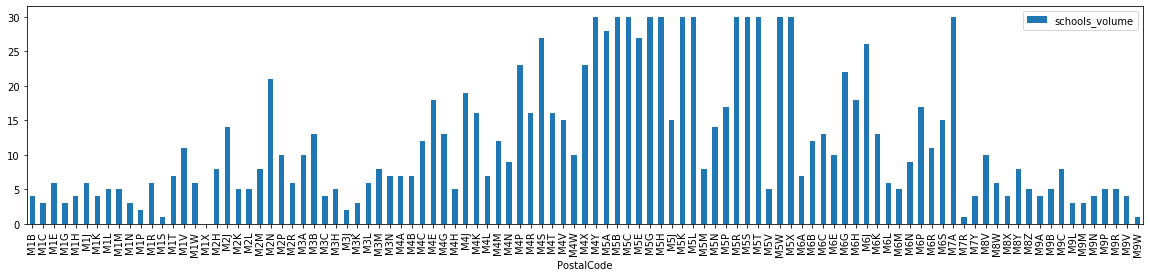

In [293]:
df.plot.bar(x='PostalCode',y='schools_volume',figsize=(20,4))


In [294]:
venues_map = folium.Map(location=[centerlat, centerlong], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of all postal code regions


# add the Italian restaurants as blue circle markers
for lat, lng, label, Bor,schools_volume in zip(df.Latitude, df.Longitude, df.PostalCode, df.Borough,df.schools_volume):
    folium.CircleMarker(
        [lat, lng],
        radius=schools_volume,
        color='blue',
        popup=label+' '+Bor,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

##### Although we are not studying population density but  we can see some clues of how the schools are actually in good numbers around each area and we can see that many areas are having same number of schools even when they are maximum

# Determining best region to live in terms of Schools availability

#### This can be determined by clustering the regions according to schools availability

So implementing the k-means clustering as of below and determine the number and location of clusters

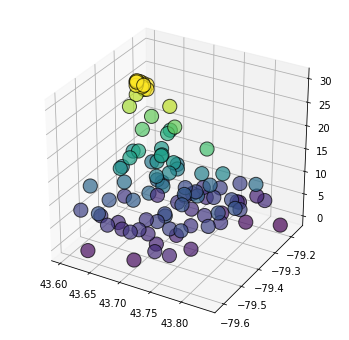

In [295]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df['Latitude']
y = df['Longitude']
z = df['schools_volume']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

     Latitude  Longitude  schools_volume
0    0.874039   0.925643      133.333333
1    0.779259   1.000000      100.000000
2    0.689565   0.938034      200.000000
3    0.721311   0.876087      100.000000
4    0.730485   0.826542      133.333333
..        ...        ...             ...
98   0.446972   0.214421      133.333333
99   0.401801   0.183555      166.666667
100  0.370080   0.134179      166.666667
101  0.586206   0.060138      133.333333
102  0.446426   0.047800       33.333333

[103 rows x 3 columns]
[-9695522.188618157, -2100355.2682496025, -707241.2918317089, -433387.175860624, -273682.1646952664]
4


C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


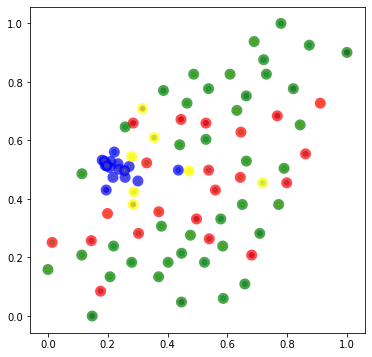

In [296]:
from sklearn import preprocessing
X=df[['Latitude','Longitude','schools_volume']]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=['Latitude','Longitude','schools_volume'])
X['schools_volume']= X['schools_volume']*1000
print(X)
scores=[]
allks = 5

x = X['Latitude']
y = X['Longitude']
h = X['schools_volume']

for kito in range(allks):
    kito += 1
    k_means3 = KMeans(init = "k-means++", n_clusters = kito, n_init = 12)
    k_means3.fit(X)
    z = k_means3.labels_
    scr=k_means3.score(X)
    scores.append(scr)
print(scores)
toscore=[abs(scr) for scr in scores]
thek = toscore.index(min(toscore))
print(thek)
fig = plt.figure(figsize=(6, 6))
colors=['red','blue','green','yellow','grey']
for k, col in zip(range(thek), colors):

    class_member_mask = (z == k)
    # Plot the datapoints that are clustered
    xy =  X.loc[class_member_mask==True]
    #plt.scatter(xy['Latitude'], xy['Longitude'],s=50, c=[col], marker=u'o', alpha=0.5)
    ax = fig.add_subplot(111)
    ax.scatter(xy['Latitude'], xy['Longitude'],
           linewidths=5, alpha=.7,
           edgecolor=col,
          
           c=xy['schools_volume'])
    
    # Plot the outliers
    #xy = X[class_member_mask & ~core_samples_mask]
    #plt.scatter(xy[0], xy[1],s=50, c=[col], marker=u'o', alpha=0.5)



plt.show()
    



from Above I choosed only 5. and due district then will group those 5 districts to get number of schools in each district then select the best district to leave in.. It is difficult to select K as from the bar chart we see that mostly all locations have nearly even distribution of schools

In [312]:
schools_volume=[]
groups=[]
for k, col in zip(range(thek), colors):
    class_member_mask = (z == k)
    # Plot the datapoints that are clustered
    xy =  X.loc[class_member_mask==True]
    origdf=df.loc[class_member_mask==True]
    schools_volume.append(origdf['schools_volume'].sum())
    groups.append(origdf)
maxschools=max(schools_volume)
print(schools_volume.index(maxschools))

print('best region to live in is which in following areas:', groups[schools_volume.index(maxschools)])


1
best region to live in is which in following areas:    PostalCode           Borough                                  Neighborhood  \
47        M4S   Central Toronto                                    Davisville   
52        M4Y  Downtown Toronto                          Church and Wellesley   
53        M5A  Downtown Toronto                    Regent Park / Harbourfront   
54        M5B  Downtown Toronto                      Garden District, Ryerson   
55        M5C  Downtown Toronto                                St. James Town   
56        M5E  Downtown Toronto                                   Berczy Park   
57        M5G  Downtown Toronto                            Central Bay Street   
58        M5H  Downtown Toronto                    Richmond / Adelaide / King   
60        M5K  Downtown Toronto     Toronto Dominion Centre / Design Exchange   
61        M5L  Downtown Toronto               Commerce Court / Victoria Hotel   
65        M5R   Central Toronto         The Annex / Nor

In [313]:
bestdf=groups[schools_volume.index(maxschools)]
venues_map = folium.Map(location=[centerlat, centerlong], zoom_start=9) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of all postal code regions


# add the Italian restaurants as blue circle markers
for lat, lng, label ,schools_volume in zip(bestdf.Latitude, bestdf.Longitude, bestdf.PostalCode,bestdf.schools_volume):
    folium.CircleMarker(
        [lat, lng],
        radius=schools_volume,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map